# Sorting Algorithms Demo
###### *make a copy of this notebook to experiment with the algorithms*

# Install required libraries

In [ ]:
!pip install numpy matplotlib

# Import the necessary libraries

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable, Dict, List, Any

# Define a function to get runtime of given function

In [ ]:
def get_runtime(function:Callable,arguments:Dict[str, Any]):
  start = time.time()
  function(**arguments)
  stop = time.time()
  return stop-start

# Selection Sort

In [ ]:
def selection_sort(container:List[Any],verbose=False):
  for i in range(len(container)):
    if verbose:
      print(f"Pass {i}: ",container)
    smallest = container.index(min(container[i:]))
    if (i != smallest):
      container[i],container[smallest] = container[smallest],container[i]
  return container

# Bubble Sort

In [ ]:
def bubble_sort(container:List[Any],verbose=False):
  is_sorted = False
  for i in range(1,len(container)):
    if verbose:
      print(f"Pass {i-1}: ",container)
    if is_sorted:
      return container
    is_sorted = True
    for j in range(len(container)-i):
      if container[j] > container[j+1]:
        container[j],container[j+1] = container[j+1],container[j]
        is_sorted = False
  return container

# Insertion Sort

In [ ]:
def insertion_sort(container:List[Any],verbose=False):
  for i in range(1,len(container)):
    if verbose:
      print(f"Pass {i-1}: ",container)
    curr = i
    while (curr > 0) and (container[curr-1] > container[curr]):
      container[curr],container[curr-1] = container[curr-1],container[curr]
      curr -= 1
  return container

# Merge Sort

In [ ]:
def merge(left:List[Any],right:List[Any]):
  merged = []
  l = 0
  r = 0
  while (l < len(left)) and (r < len(right)):
    if left[l] <= right[r]:
      merged.append(left[l])
      l += 1
    else:
      merged.append(right[r])
      r += 1
  remaining = left[l:] if l < len(left) else right[r:]
  merged.extend(remaining)
  return merged

def merge_sort(
    container:List[Any],
    minimum:int=1,
    optimizer:Callable=insertion_sort,
    verbose=False
  ):
  if verbose:
    print("Current Container:", container)
  if len(container) <= minimum:
    return optimizer(container)
  middle = len(container)//2
  left = merge_sort(container[:middle],minimum,optimizer,verbose)
  if verbose:
    print("Left Container:", left)
  right = merge_sort(container[middle:],minimum,optimizer,verbose)
  if verbose:
    print("Right Container:", right)
  return merge(left,right)

# Quick Sort

In [ ]:
def partition(container:List[Any],first:int,last:int,verbose=False):
  if verbose:
    print("Initial:",container)
  middle = (first+last)//2
  if (last - first + 1) >= 3:
    container[first],container[last],container[middle] = sorted([container[first],container[middle],container[last]])
  if verbose:
    print("After Pivot Selection:",container)
  pivot_value = container[last]
  left = first
  right = last-1
  # Shift things based on their value compared to the pivot
  while True:
    if verbose:
      print(f"Pass(left={left},right={right}):",container)
    while left <= right and container[left] < pivot_value:
      left += 1
    while left <= right and container[right] > pivot_value:
      right -= 1
    if left >= right: break
    container[left],container[right] = container[right],container[left]
    left += 1
    right -= 1
  if verbose:
    print("After Loop:",container)
  container[left],container[last] = container[last],container[left]
  if verbose:
    print("Finally:",container)
  return left

def quick_sort(container:List[Any],first:int,last:int,minimum:int=1,optimizer:Callable=insertion_sort,verbose=False):
  if verbose:
    print(f"Pass({first},{last}):", container)
  if last <= first: return container
  if (last - first + 1) < minimum:
    container[first:last] = optimizer(container[first:last])
    return container
  pivot = partition(container,first,last)
  if verbose:
    print("After Partition:",container)
    print("Pivot Index:", pivot)
  quick_sort(container,first,pivot-1,minimum,optimizer,verbose)
  quick_sort(container,pivot+1,last,minimum,optimizer,verbose)
  return container

# Get Runtimes For Each Algorithm

In [ ]:
def get_times(algorithm:Callable,ranges:List[int],seed:int,arguments:Dict[str,Any]={}) -> List[float]:
  times = []
  for i in ranges:
    np.random.seed(seed)
    arr = np.random.randint(0,i,i).tolist()
    arguments["container"] = arr
    if "first" in arguments.keys():
      arguments["last"] = i-1
    times.append(get_runtime(algorithm,arguments))
  return times

In [ ]:
ranges = list(range(100,5000,100))
seed = 2026
selection_t = get_times(selection_sort,ranges,seed)
bubble_t = get_times(bubble_sort,ranges,seed)
insertion_t = get_times(insertion_sort,ranges,seed)
merge_t = get_times(merge_sort,ranges,seed)
quick_t = get_times(quick_sort,ranges,seed,arguments={"first":0})

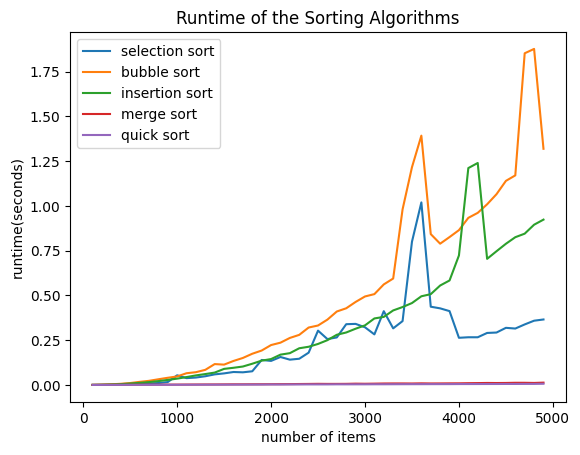

In [ ]:
plt.plot(ranges,selection_t,label="selection sort")
plt.plot(ranges,bubble_t,label="bubble sort")
plt.plot(ranges,insertion_t,label="insertion sort")
plt.plot(ranges,merge_t,label="merge sort")
plt.plot(ranges,quick_t,label="quick sort")
plt.legend()
plt.title("Runtime of the Sorting Algorithms")
plt.xlabel("number of items")
plt.ylabel("runtime(seconds)")
plt.show()

# View Steps

## Selection Sort Steps

In [ ]:
unsorted = [5,2,3,4,1,7,6]

In [ ]:
test = unsorted.copy()
selection_sort(test,True)

Pass 0:  [5, 2, 3, 4, 1, 7, 6]
Pass 1:  [1, 2, 3, 4, 5, 7, 6]
Pass 2:  [1, 2, 3, 4, 5, 7, 6]
Pass 3:  [1, 2, 3, 4, 5, 7, 6]
Pass 4:  [1, 2, 3, 4, 5, 7, 6]
Pass 5:  [1, 2, 3, 4, 5, 7, 6]
Pass 6:  [1, 2, 3, 4, 5, 6, 7]


[1, 2, 3, 4, 5, 6, 7]

## Bubble Sort Steps

In [ ]:
test = unsorted.copy()
bubble_sort(test,True)

Pass 0:  [5, 2, 3, 4, 1, 7, 6]
Pass 1:  [2, 3, 4, 1, 5, 6, 7]
Pass 2:  [2, 3, 1, 4, 5, 6, 7]
Pass 3:  [2, 1, 3, 4, 5, 6, 7]
Pass 4:  [1, 2, 3, 4, 5, 6, 7]
Pass 5:  [1, 2, 3, 4, 5, 6, 7]


[1, 2, 3, 4, 5, 6, 7]

## Insertion Sort Steps

In [ ]:
test = unsorted.copy()
insertion_sort(test,True)

Pass 0:  [5, 2, 3, 4, 1, 7, 6]
Pass 1:  [2, 5, 3, 4, 1, 7, 6]
Pass 2:  [2, 3, 5, 4, 1, 7, 6]
Pass 3:  [2, 3, 4, 5, 1, 7, 6]
Pass 4:  [1, 2, 3, 4, 5, 7, 6]
Pass 5:  [1, 2, 3, 4, 5, 7, 6]


[1, 2, 3, 4, 5, 6, 7]

## Merge Sort Steps

In [ ]:
test = unsorted.copy()
merge_sort(test,verbose=True)

Current Container: [5, 2, 3, 4, 1, 7, 6]
Current Container: [5, 2, 3]
Current Container: [5]
Left Container: [5]
Current Container: [2, 3]
Current Container: [2]
Left Container: [2]
Current Container: [3]
Right Container: [3]
Right Container: [2, 3]
Left Container: [2, 3, 5]
Current Container: [4, 1, 7, 6]
Current Container: [4, 1]
Current Container: [4]
Left Container: [4]
Current Container: [1]
Right Container: [1]
Left Container: [1, 4]
Current Container: [7, 6]
Current Container: [7]
Left Container: [7]
Current Container: [6]
Right Container: [6]
Right Container: [6, 7]
Right Container: [1, 4, 6, 7]


[1, 2, 3, 4, 5, 6, 7]

## Quick Sort Steps

In [ ]:
test = unsorted.copy()
quick_sort(test,first=0,last=len(test)-1,verbose=True)

Pass(0,6): [5, 2, 3, 4, 1, 7, 6]
After Partition: [4, 2, 3, 1, 5, 7, 6]
Pivot Index: 4
Pass(0,3): [4, 2, 3, 1, 5, 7, 6]
After Partition: [1, 2, 3, 4, 5, 7, 6]
Pivot Index: 1
Pass(0,0): [1, 2, 3, 4, 5, 7, 6]
Pass(2,3): [1, 2, 3, 4, 5, 7, 6]
After Partition: [1, 2, 3, 4, 5, 7, 6]
Pivot Index: 3
Pass(2,2): [1, 2, 3, 4, 5, 7, 6]
Pass(4,3): [1, 2, 3, 4, 5, 7, 6]
Pass(5,6): [1, 2, 3, 4, 5, 7, 6]
After Partition: [1, 2, 3, 4, 5, 6, 7]
Pivot Index: 5
Pass(5,4): [1, 2, 3, 4, 5, 6, 7]
Pass(6,6): [1, 2, 3, 4, 5, 6, 7]


[1, 2, 3, 4, 5, 6, 7]

### Partition Function

In [ ]:
test = unsorted.copy()
partition(test,0,len(test)-1,True)

Initial: [5, 2, 3, 4, 1, 7, 6]
After Pivot Selection: [4, 2, 3, 6, 1, 7, 5]
Pass(left=0,right=5): [4, 2, 3, 6, 1, 7, 5]
Pass(left=4,right=3): [4, 2, 3, 1, 6, 7, 5]
After Loop: [4, 2, 3, 1, 6, 7, 5]
Finally: [4, 2, 3, 1, 5, 7, 6]


4